In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup as bs


In [462]:
base_url = 'https://www.imdb.com'

In [463]:
main_page = requests.get(base_url + '/chart/top/?ref_=nv_mv_250')

In [464]:
main_page_soup = bs(main_page.text, 'html.parser')

In [465]:
links = main_page_soup.select('.titleColumn')


In [466]:

hrefs = []
for link in links:
    hrefs.append(link.find('a').get('href'))

In [467]:
def create_movie_info(hrefs):
    movie_names = []
    movie_directors = []
    movie_durations = []
    movie_genres = []
    movie_descriptions = []
    movie_release_dates = []
    movie_ratings = []
    movie_stars = []
    movie_filming_dates = []


    for href in hrefs:
        url = base_url + href
        movie_page = requests.get(url)
        movie_soup = bs(movie_page.text, 'html.parser')
        
        movie_names.append(get_movie_name(movie_soup))
        movie_directors.append(get_directors(movie_soup))
        movie_durations.append(get_duration(movie_soup))
        movie_genres.append(get_movie_genre(movie_soup))
        movie_descriptions.append(get_description(movie_soup))
        movie_release_dates.append(get_release_date(movie_soup))
        movie_ratings.append(get_rating(movie_soup))
        movie_stars.append(get_stars(movie_soup))
        movie_filming_dates.append(get_filming_dates(href))
        

    return {'names': movie_names, 
            'directors': movie_directors,
            'duration': movie_durations,
            'genre': movie_genres,
            'descriptions': movie_descriptions,
            'release_dates': movie_release_dates,
            'ratings': movie_ratings,
            'stars': movie_stars,
            'filming_dates': movie_filming_dates
            }


    

In [468]:
len(movie_names), len(movie_directors), len(movie_descriptions)

(250, 250, 250)

# Movie name, Genre, release date, 

In [469]:

def get_movie_name(movie_soup):
    for i in movie_soup.select('.title_wrapper'):
        return i.getText().replace('\n', '').split('|')[0].split(')')[0].split('(')[0]
        

In [470]:
def get_movie_genre(movie_soup):
    for i in movie_soup.select('.title_wrapper'):
        return i.getText().replace('\n', '').split('|')[2]
        

In [471]:
def get_release_date(movie_soup):
    for i in movie_soup.select('.title_wrapper'):
        return i.getText().replace('\n', '').split('|')[3].split('(')[0]

# Rating

In [472]:
def get_rating(movie_soup):
    for i in movie_soup.select('.ratingValue'):
        return i.getText().strip().split('/')[0]

In [473]:
for i in movie_soup.select('.ratingValue'):
     print(i.getText().strip().split('/')[0])

8.0


# Director And Stars

In [474]:

for i in movie_soup.select('.credit_summary_item'):
    directors = ''
    #stars = []
    #print(i)
    all = i.findAll('a', href=True)
    #print(i.find('h4').getText())
    for j in all:
        if i.find('h4').getText() == 'Director:':
            directors += j.getText()
            print(type(directors))



<class 'str'>


In [494]:
def get_directors(movie_soup):
    for i in movie_soup.select('.credit_summary_item'):
        directors = ''
        #stars = []
        #print(i)
        all = i.findAll('a', href=True)
        #print(i.find('h4').getText())
        for j in all:
            if i.find('h4').getText() == 'Director:':
                directors = directors + ' ' + j.getText()
                
        return directors

In [537]:
def get_stars(movie_soup):
    for i in movie_soup.select('.credit_summary_item'):
        stars = ''
        #stars = []
        #print(i)
        all = i.findAll('a', href=True)
        #print(i.find('h4').getText())
        for j in all:
            if (i.find('h4').getText() == 'Stars:') & (len(stars.split(',')) <= 3):
                stars =  stars + j.getText() + ', '
                
    return stars

# Description

In [538]:
def get_description(movie_soup):
    for i in movie_soup.select('.article'):
        if i.find('div', attrs={'class': 'inline canwrap'}):
            return i.find('div', attrs={'class': 'inline canwrap'}).getText().strip()

# Duration

In [539]:
def get_duration(movie_soup):
    for i in movie_soup.select('.txt-block'):
        if i.find('time') is None:
            pass
        else:
            return i.find('time').getText().split(' ')[0]
            #print(type(i.find('time')))
            #print(i.find('time').get_text())

# Filming Dates

In [540]:
# locations?ref_=tt_dt_dt#filming_dates

In [541]:
def get_filming_dates(href):
    page = requests.get(base_url + href + 'locations?ref_=tt_dt_dt#filming_dates')
    soup = bs(page.text, 'html.parser')
    for item in soup.select('.ipl-zebra-list__item'):
        return item.get_text().strip()

In [542]:

movie_dict = create_movie_info(hrefs)

In [544]:
df = pd.DataFrame(movie_dict)

In [545]:
df.head(4)

,names,directors,duration,genre,descriptions,release_dates,ratings,stars,filming_dates
0,The Shawshank Redemption,Frank Darabont,142,Drama,Chronicles the experiences of a formerly succe...,17 February 1995,9.3,"Tim Robbins, Morgan Freeman, Bob Gunton,",16 June 1993 - 10 September 1993
1,The Godfather,Francis Ford Coppola,175,"Crime, Drama","The Godfather ""Don"" Vito Corleone is the head ...",24 August 1972,9.2,"Marlon Brando, Al Pacino, James Caan,",29 March 1971 - 6 August 1971
2,The Godfather: Part II,Francis Ford Coppola,202,"Crime, Drama",The continuing saga of the Corleone crime fami...,15 May 1975,9.0,"Al Pacino, Robert De Niro, Robert Duvall,",1 October 1973 - 19 June 1974
3,The Dark Knight,Christopher Nolan,152,"Action, Crime, Drama",Set within a year after the events of Batman B...,24 July 2008,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart,",18 April 2007 - 11 November 2007


In [546]:
df.to_csv('imdb.csv')

In [547]:
##normed_df = (df - df.min()) / (df.max() - df.min())


In [550]:
new_df = df['ratings'].astype(float) / df['duration'].astype(float)

In [551]:
new_df

0      0.065493
1      0.052571
2      0.044554
3      0.059211
4      0.093750
         ...   
245    0.081633
246    0.066942
247    0.094253
248    0.112500
249    0.074766
Length: 250, dtype: float64

In [552]:
normed_df = (new_df - new_df.min()) / (new_df.max() - new_df.min())

In [553]:
normed_df

0      0.254969
1      0.172497
2      0.121328
3      0.214871
4      0.435321
         ...   
245    0.357981
246    0.264219
247    0.438531
248    0.554994
249    0.314157
Length: 250, dtype: float64

In [554]:
df['Normed_rating_duratiion_ratio'] = normed_df

In [555]:
df.head()

,names,directors,duration,genre,descriptions,release_dates,ratings,stars,filming_dates,Normed_rating_duratiion_ratio
0,The Shawshank Redemption,Frank Darabont,142,Drama,Chronicles the experiences of a formerly succe...,17 February 1995,9.3,"Tim Robbins, Morgan Freeman, Bob Gunton,",16 June 1993 - 10 September 1993,0.254969
1,The Godfather,Francis Ford Coppola,175,"Crime, Drama","The Godfather ""Don"" Vito Corleone is the head ...",24 August 1972,9.2,"Marlon Brando, Al Pacino, James Caan,",29 March 1971 - 6 August 1971,0.172497
2,The Godfather: Part II,Francis Ford Coppola,202,"Crime, Drama",The continuing saga of the Corleone crime fami...,15 May 1975,9.0,"Al Pacino, Robert De Niro, Robert Duvall,",1 October 1973 - 19 June 1974,0.121328
3,The Dark Knight,Christopher Nolan,152,"Action, Crime, Drama",Set within a year after the events of Batman B...,24 July 2008,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart,",18 April 2007 - 11 November 2007,0.214871
4,12 Angry Men,Sidney Lumet,96,"Crime, Drama",The defense and the prosecution have rested an...,10 April 1957,9.0,"Henry Fonda, Lee J. Cobb, Martin Balsam,",June 1956 - July 1956,0.435321


In [556]:
#mean_normalized_df=(df-df.mean())/df.std()


In [570]:
year = []
for item in df['release_dates'].apply(lambda x: x.split()):
    year.append(item[-1])

In [571]:
df['year'] = year

In [572]:
df.head()

,names,directors,duration,genre,descriptions,release_dates,ratings,stars,filming_dates,Normed_rating_duratiion_ratio,year
0,The Shawshank Redemption,Frank Darabont,142,Drama,Chronicles the experiences of a formerly succe...,17 February 1995,9.3,"Tim Robbins, Morgan Freeman, Bob Gunton,",16 June 1993 - 10 September 1993,0.254969,1995
1,The Godfather,Francis Ford Coppola,175,"Crime, Drama","The Godfather ""Don"" Vito Corleone is the head ...",24 August 1972,9.2,"Marlon Brando, Al Pacino, James Caan,",29 March 1971 - 6 August 1971,0.172497,1972
2,The Godfather: Part II,Francis Ford Coppola,202,"Crime, Drama",The continuing saga of the Corleone crime fami...,15 May 1975,9.0,"Al Pacino, Robert De Niro, Robert Duvall,",1 October 1973 - 19 June 1974,0.121328,1975
3,The Dark Knight,Christopher Nolan,152,"Action, Crime, Drama",Set within a year after the events of Batman B...,24 July 2008,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart,",18 April 2007 - 11 November 2007,0.214871,2008
4,12 Angry Men,Sidney Lumet,96,"Crime, Drama",The defense and the prosecution have rested an...,10 April 1957,9.0,"Henry Fonda, Lee J. Cobb, Martin Balsam,",June 1956 - July 1956,0.435321,1957


In [582]:
df['ratings'] = df['ratings'].astype(float)

In [598]:
df['release_dates'] = pd.to_datetime(df['release_dates'], format='%d %B %Y', errors='ignore')


In [602]:
sorted_df = df.sort_values(by='release_dates')

In [584]:
year_grp = df.groupby('year')

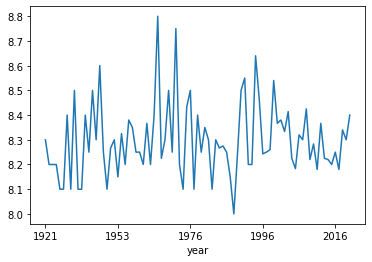

In [589]:
year_grp['ratings'].mean().plot();


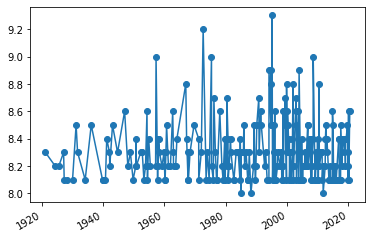

In [606]:
plt.plot_date(sorted_df['release_dates'], sorted_df['ratings'], linestyle='solid')

plt.gcf().autofmt_xdate()

In [613]:
df['year2'] = df['release_dates'].dt.year


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   names                          250 non-null    object        
 1   directors                      250 non-null    object        
 2   duration                       250 non-null    object        
 3   genre                          250 non-null    object        
 4   descriptions                   250 non-null    object        
 5   release_dates                  250 non-null    datetime64[ns]
 6   ratings                        250 non-null    float64       
 7   stars                          250 non-null    object        
 8   filming_dates                  204 non-null    object        
 9   Normed_rating_duratiion_ratio  250 non-null    float64       
 10  year                           250 non-null    object        
 11  year2              

In [624]:
rating_by_year = df.groupby('year2')['ratings'].mean()
type(rating_by_year)

pandas.core.series.Series

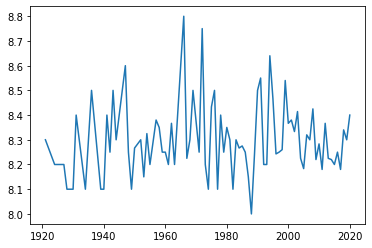

In [625]:
plt.plot(rating_by_year)

In [648]:
from collections import Counter
actor_counter = Counter()
director_counter = Counter()


In [630]:
df.head()

,names,directors,duration,genre,descriptions,release_dates,ratings,stars,filming_dates,Normed_rating_duratiion_ratio,year,year2
0,The Shawshank Redemption,Frank Darabont,142,Drama,Chronicles the experiences of a formerly succe...,1995-02-17,9.3,"Tim Robbins, Morgan Freeman, Bob Gunton,",16 June 1993 - 10 September 1993,0.254969,1995,1995
1,The Godfather,Francis Ford Coppola,175,"Crime, Drama","The Godfather ""Don"" Vito Corleone is the head ...",1972-08-24,9.2,"Marlon Brando, Al Pacino, James Caan,",29 March 1971 - 6 August 1971,0.172497,1972,1972
2,The Godfather: Part II,Francis Ford Coppola,202,"Crime, Drama",The continuing saga of the Corleone crime fami...,1975-05-15,9.0,"Al Pacino, Robert De Niro, Robert Duvall,",1 October 1973 - 19 June 1974,0.121328,1975,1975
3,The Dark Knight,Christopher Nolan,152,"Action, Crime, Drama",Set within a year after the events of Batman B...,2008-07-24,9.0,"Christian Bale, Heath Ledger, Aaron Eckhart,",18 April 2007 - 11 November 2007,0.214871,2008,2008
4,12 Angry Men,Sidney Lumet,96,"Crime, Drama",The defense and the prosecution have rested an...,1957-04-10,9.0,"Henry Fonda, Lee J. Cobb, Martin Balsam,",June 1956 - July 1956,0.435321,1957,1957


In [633]:
df['stars'].apply(lambda x: x.split(','))

0         [Tim Robbins,  Morgan Freeman,  Bob Gunton,  ]
1            [Marlon Brando,  Al Pacino,  James Caan,  ]
2        [Al Pacino,  Robert De Niro,  Robert Duvall,  ]
3      [Christian Bale,  Heath Ledger,  Aaron Eckhart...
4         [Henry Fonda,  Lee J. Cobb,  Martin Balsam,  ]
                             ...                        
245      [Cary Elwes,  Mandy Patinkin,  Robin Wright,  ]
246      [Brahim Hadjadj,  Jean Martin,  Yacef Saadi,  ]
247    [Lembit Ulfsak,  Elmo Nüganen,  Giorgi Nakashi...
248    [Charles Chaplin,  Merna Kennedy,  Al Ernest G...
249    [Arnold Schwarzenegger,  Linda Hamilton,  Mich...
Name: stars, Length: 250, dtype: object

In [645]:
for item in df['stars'].apply(lambda x: x.strip().split(',')):
    actor_counter.update(item)

In [646]:
actor_counter.most_common()

[('', 750),
 (' ', 250),
 ('Robert De Niro', 24),
 ('Charles Chaplin', 24),
 ('Tom Hanks', 20),
 ('Leonardo DiCaprio', 20),
 ('Christian Bale', 16),
 ('Clint Eastwood', 16),
 ('Toshirô Mifune', 16),
 ('James Stewart', 16),
 (' Morgan Freeman', 12),
 ('Al Pacino', 12),
 (' Robert De Niro', 12),
 ('Elijah Wood', 12),
 (' Ian McKellen', 12),
 ('Mark Hamill', 12),
 (' Harrison Ford', 12),
 (' Carrie Fisher', 12),
 (' Joe Pesci', 12),
 ('Jack Nicholson', 12),
 (' Matt Damon', 12),
 ('Kevin Spacey', 12),
 ('Harrison Ford', 12),
 (' Mark Ruffalo', 12),
 ('Aamir Khan', 12),
 ('Marlon Brando', 8),
 (' Robert Duvall', 8),
 ('Henry Fonda', 8),
 (' Lee J. Cobb', 8),
 (' Viggo Mortensen', 8),
 (' Lee Van Cleef', 8),
 ('Brad Pitt', 8),
 (' Robin Wright', 8),
 (' Carrie-Anne Moss', 8),
 (' Brad Pitt', 8),
 (' Anne Hathaway', 8),
 ('Song Kang-Ho', 8),
 (' Natalie Portman', 8),
 ('Tatsuya Nakadai', 8),
 ('Arnold Schwarzenegger', 8),
 (' Linda Hamilton', 8),
 (' Edward Furlong', 8),
 (' Paulette Goddard

In [659]:
director_list = {}

In [664]:
for item in df['directors'].apply(lambda x: x):
    if item in director_list:
        director_list[item] += 1
    else:
        director_list[item] = 1

In [651]:
df['directors'].unique()

array([' Frank Darabont', ' Francis Ford Coppola', ' Christopher Nolan',
       ' Sidney Lumet', ' Steven Spielberg', ' Peter Jackson',
       ' Quentin Tarantino', ' Sergio Leone', ' David Fincher',
       ' Robert Zemeckis', ' Irvin Kershner', '', ' Martin Scorsese',
       ' Milos Forman', ' Akira Kurosawa', ' Roberto Benigni',
       ' Jonathan Demme', ' Frank Capra', ' George Lucas',
       ' Hayao Miyazaki', ' Bong Joon Ho', ' Luc Besson', ' Bryan Singer',
       ' Masaki Kobayashi', ' Roman Polanski', ' James Cameron',
       ' Tony Kaye', ' Charles Chaplin', ' Alfred Hitchcock',
       ' Ridley Scott', ' Damien Chazelle', ' Isao Takahata',
       ' Thomas Kail', ' Michael Curtiz', ' Giuseppe Tornatore',
       ' Florian Henckel von Donnersmarck', ' Todd Phillips',
       ' Stanley Kubrick', ' Andrew Stanton', ' Billy Wilder',
       ' Chan-wook Park', ' Makoto Shinkai', ' Sam Mendes', ' Mel Gibson',
       ' Wolfgang Petersen', ' Rajkumar Hirani', ' John Lasseter',
       ' Nad

In [667]:
#director_list

In [681]:
dir_df = pd.DataFrame(director_list, index=['director']).T.sort_values('director', ascending=False)

In [693]:
dir_df.drop(dir_df.index[0], inplace=True)

In [695]:
dir_df[:15]

,director
Martin Scorsese,14
Christopher Nolan,14
Stanley Kubrick,14
Charles Chaplin,12
Steven Spielberg,12
Alfred Hitchcock,12
Akira Kurosawa,12
Hayao Miyazaki,10
Billy Wilder,10
Quentin Tarantino,10


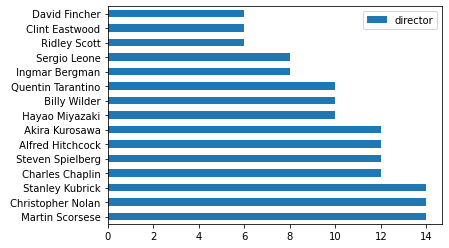

In [699]:
dir_df[:15].plot(kind='barh');

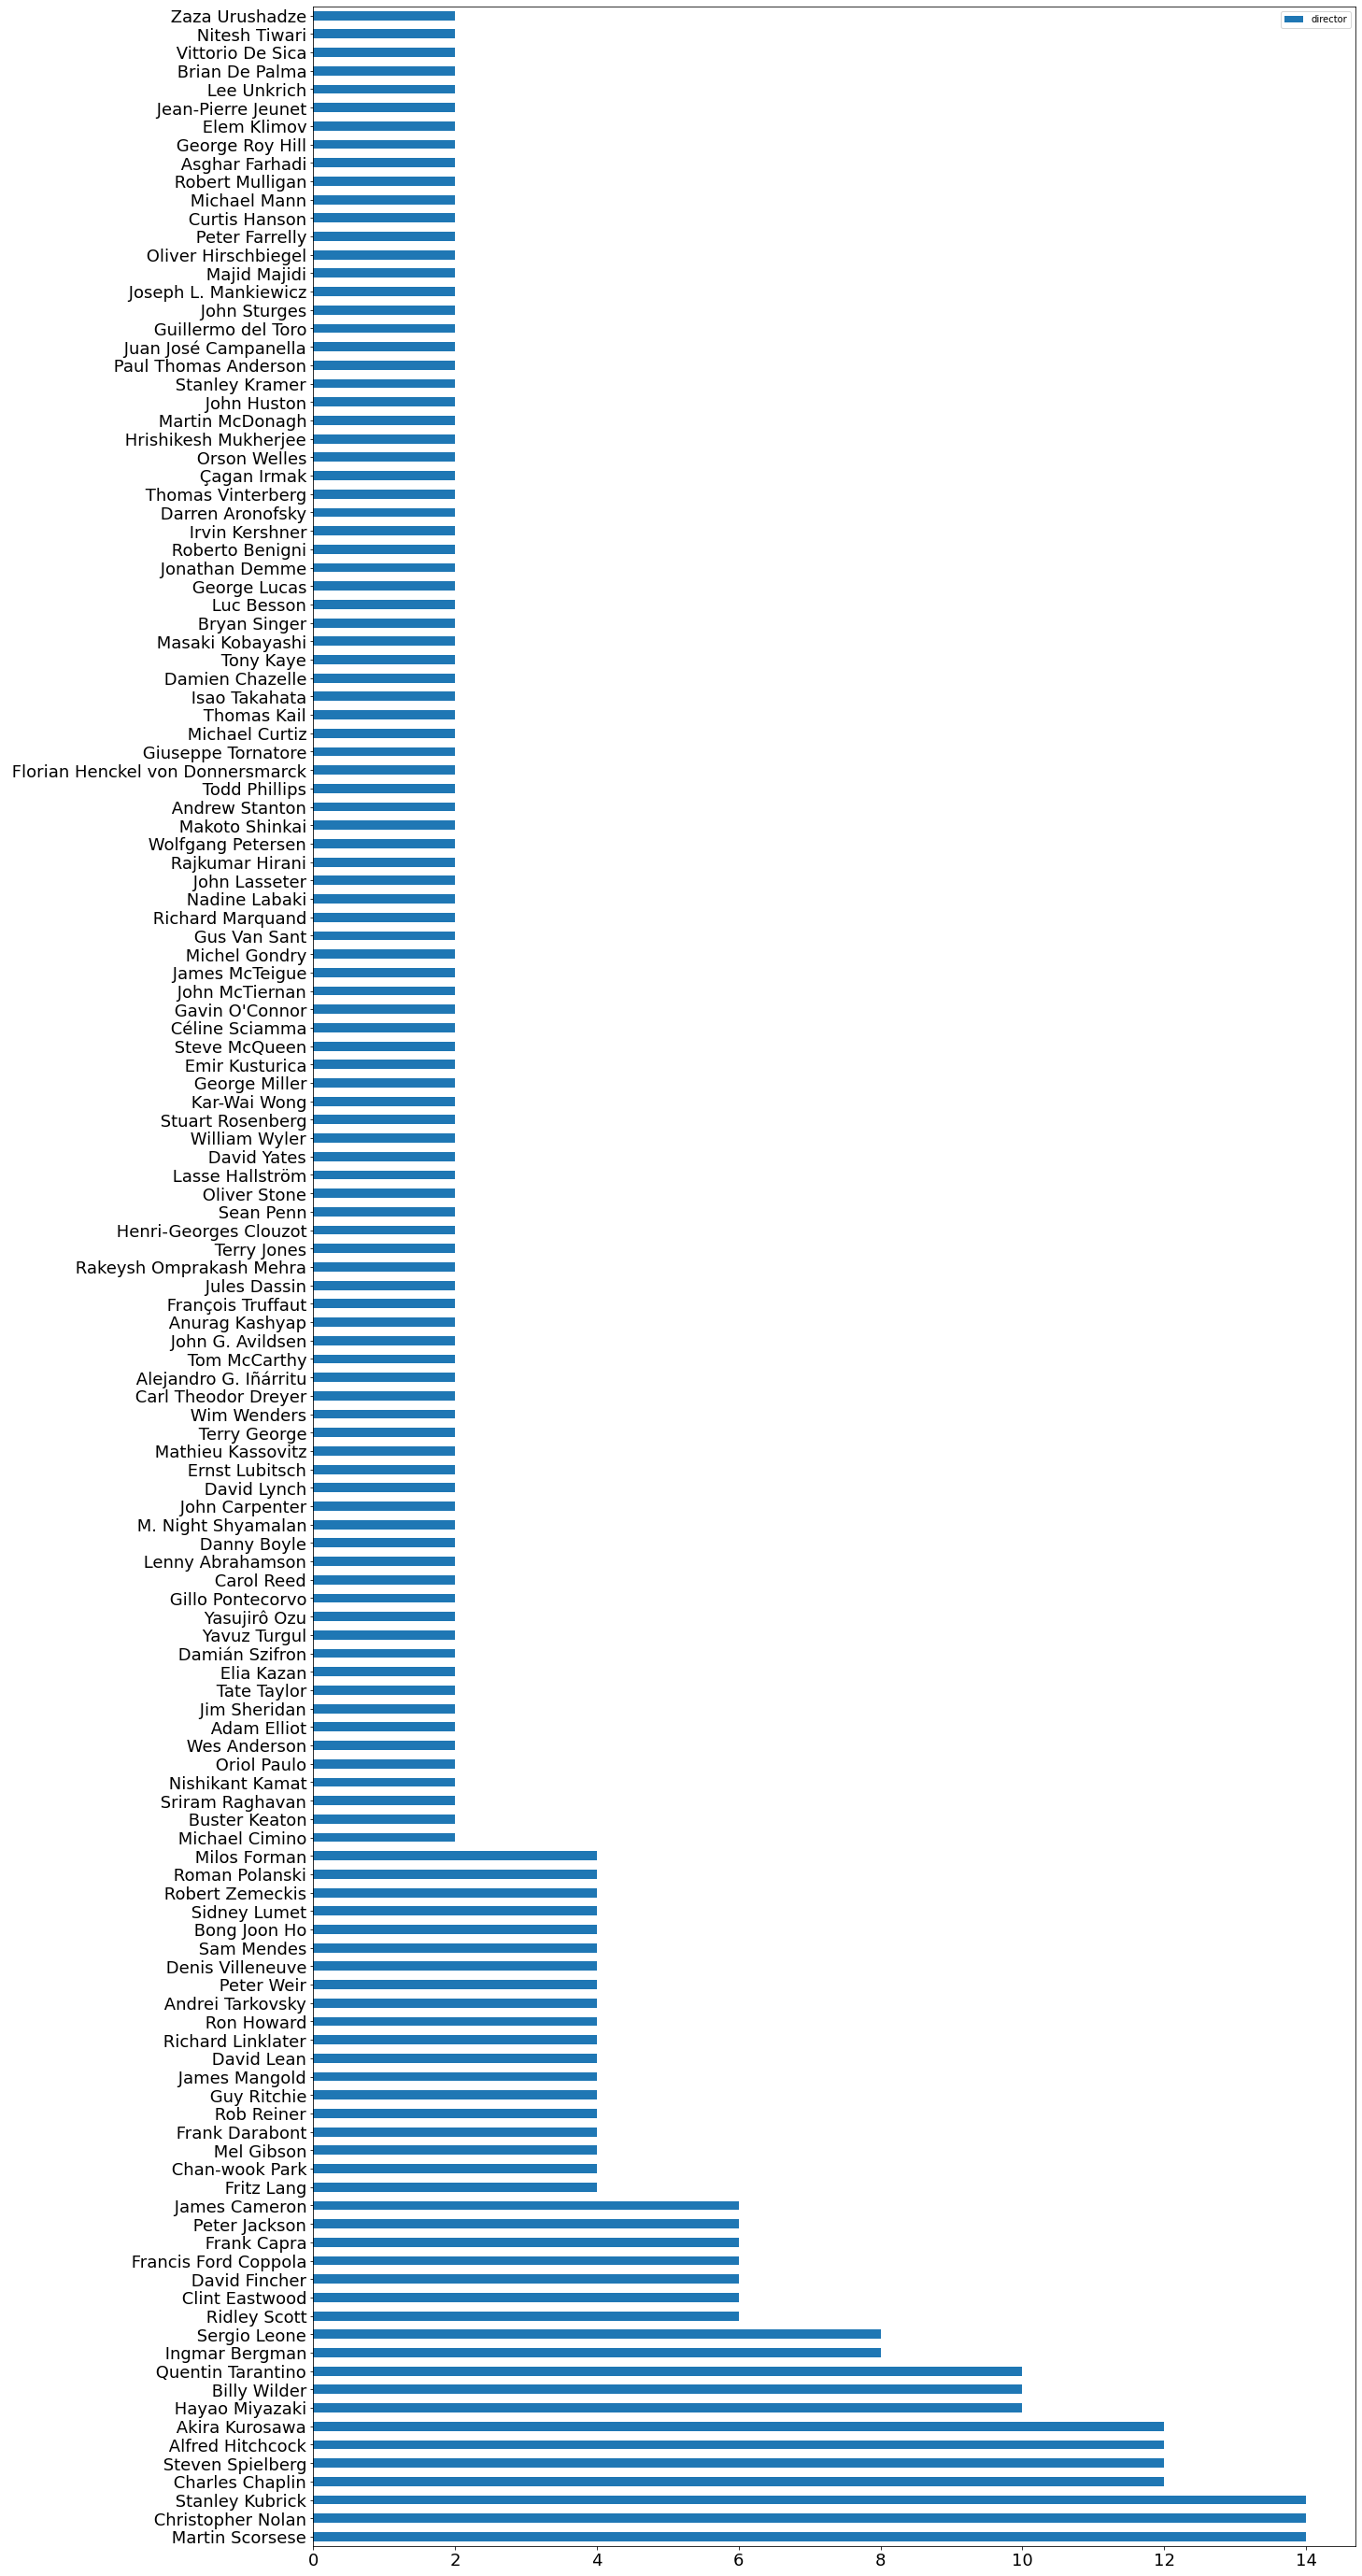

In [705]:
dir_df.plot(kind='barh', figsize=(20, 50), fontsize=18);